## 6.4 task

### This script contains the following:
#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis


### 1. Importing libraries and data


In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
# This is order for graphs are displayed within the notebook
%matplotlib inline

In [18]:
#Import data 
df = pd.read_csv('C:/Users/sosia/OneDrive/Desktop/CF/Data immersion/6/6.1/df_clean.csv')

#### 2. Data cleaning
## Data have been cleaned in previous tasks

#### 3. Data prep for regression analysis


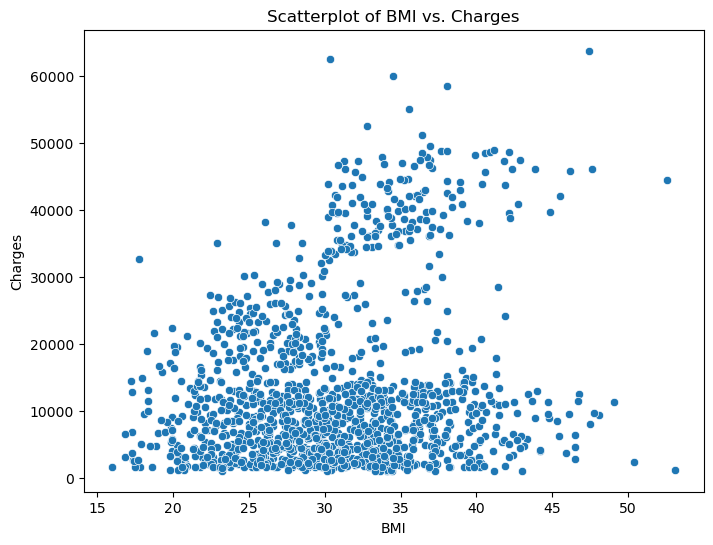

In [23]:
# Scatterplot to explore relationship between 'bmi' and 'charges'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bmi', y='charges', data=df)
plt.title('Scatterplot of BMI vs. Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

#### Hypothesis:  There is a positive linear relationship between Body Mass Index (BMI) and medical charges.  
#### Individuals with higher BMIs are expected to have higher medical charges due to potential health issues.

In [47]:
# Independent variable (x) and dependent variable (y)
X = df['bmi'].values.reshape(-1, 1)  
y = df['charges'].values.reshape(-1, 1)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)  

#### 4. Regression analysis

In [53]:
# Linear Regression model
regression = LinearRegression() 
regression.fit(X_train, y_train)

LinearRegression()

In [55]:
# Predictions on the test set
y_pred = model.predict(X_test)

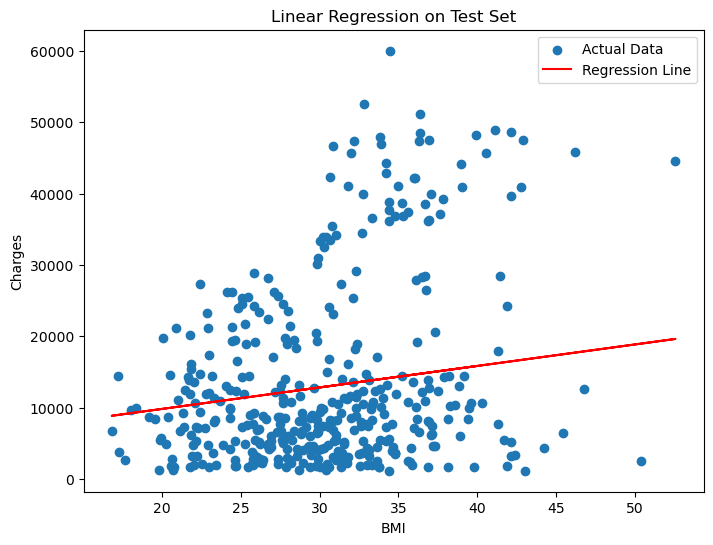

In [57]:
# Scatterplot showing the regression line
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, label='Actual Data')  # Scatter plot of actual data points
plt.plot(X_test, y_pred, color='red', label='Regression Line')  # Regression line
plt.title('Linear Regression on Test Set')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend()
plt.show()

#### Interpretation scatterplot

#### The linear regression line in the plot attempts to capture the general trend between BMI and medical charges.
#### The data points are quite dispersed, indicating that BMI alone is not a strong predictor of medical charges.
#### While there's a slight upward trend, suggesting that higher BMIs tend to be associated with higher charges, there's a lot of variability 
#### that the line doesn't explain.  Many points lie far from the line, implying that other factors significantly influence medical costs.

In [64]:
# Evaluation
print('Slope:' ,regression.coef_)
print('Mean squared error: ')
print('R2 score: ', r2)

Slope: [[301.18863244]]
Mean squared error: 
R2 score:  0.05879287466812988


In [74]:
# Predictions
y_predicted_train = regression.predict(X_train)
y_predicted_test = regression.predict(X_test)  # Predict on the test set

In [76]:
# Evaluation
rmse_train = mean_squared_error(y_train, y_predicted_train, squared=False)  # Use squared=False for RMSE
r2_train = r2_score(y_train, y_predicted_train)

C:\Users\sosia\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [88]:
comparison_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(comparison_df.head())

       Actual     Predicted
0   1633.9618  15772.620396
1   8547.6913  12625.199187
2   9290.1395  13221.552680
3  32548.3405  12890.245184
4   9644.2525   9215.743868


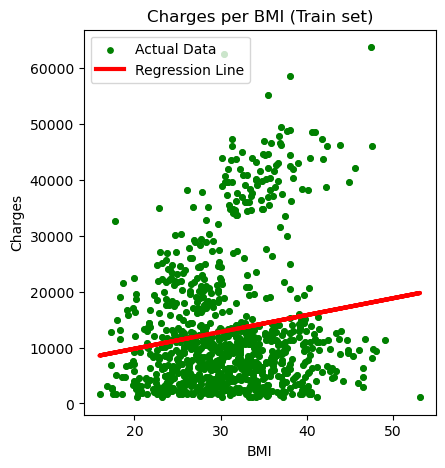

In [90]:
# Visualization
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Charges per BMI (Train set)')
plot_test.xlabel('BMI')
plot_test.ylabel('Charges')
plot_test.show()

#### Based on the visual inspection of the plot and the calculated MSE and R² values, the model's performance on the test set appears to be quite limited.  The relatively high MSE suggests that the predictions are, on average, quite far from the actual charges. 

#### If there is data bias the model's predictions may be skewed. If the data was collected from a specific hospital or insurance provider, it might not reflect the general population. Also certain groups of people may be excluded from the dataset, leading to a biased representation.